Stats701 Homework 6  
Name: David Li

In [2]:
# Prelims of modules / packages
import numpy as np
import scipy as sp
import scipy.stats
from scipy.stats import bernoulli, norm
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
%matplotlib inline

Part 1: Warmup - Plotting CLTs  
(Spent about 2 hours)

Q1, Q2, Q3: Subplots, Formatting, Adding normal densities

-0.026262773200317995
0.970360227679033
-0.013199999999999903
0.9747057600000001
0.03269719891974141
1.0079026602054
-0.04079999999999991
0.9313353600000002


/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


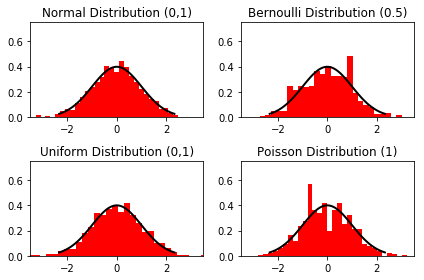

In [3]:
n = 100 # Our specified sample size
m = 1000 # Independent draws

# For overlaying the standard normal curve
y = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100) 
rv = norm() 

plt.subplot(221) # Top-left
plt.title('Normal Distribution (0,1)')
normmeans = [] # List to hold the sampling distribution of mean
for x in range(m): # 1000 draws
    normvalues = np.random.normal(0, 1, n) # Simulate from Normal distribution
    samplemean = np.mean(normvalues) # Central Limit Theorem 
    quantity = (n**0.5)*samplemean
    normmeans.append(quantity)
plt.hist(normmeans, 30, density = True, facecolor = 'red') # Histogram
plt.plot(y,rv.pdf(y), 'k-', lw=2) # Overlay-ed curve
print(np.mean(normmeans)) # Should be 0
print(np.var(normmeans)) # Should be 1

plt.subplot(222) # Top-right
plt.title('Bernoulli Distribution (0.5)')
bernmeans = [] # List to hold the sampling distribution of mean
for x in range(m): # 1000 draws
    bernvalues = bernoulli.rvs(0.5, size = n) # Simulate from Bernoulli distribution
    samplemean = np.mean(bernvalues)
    quantity = (n**0.5)*((samplemean - 0.5) / ((0.5**2)**0.5)) # Central Limit Theorem
    bernmeans.append(quantity)
plt.hist(bernmeans, 30, density = True, facecolor = 'red') # Histogram
plt.plot(y,rv.pdf(y), 'k-', lw=2) # Overlay-ed curve
print(np.mean(bernmeans)) # Should be 0
print(np.var(bernmeans)) # Should be 1

plt.subplot(223) # Bottom-left
plt.title('Uniform Distribution (0,1)')
unifmeans = [] # List to hold the sampling distribution of mean
for x in range(m): # 1000 draws
    unifvalues = np.random.uniform(0,1,n) # Simulate from Uniform distribution
    samplemean = np.mean(unifvalues)
    quantity = (n**0.5)*(12**0.5)*((samplemean - 0.5)) # Central Limit Theorem
    unifmeans.append(quantity)
plt.hist(unifmeans, 30, density = True, facecolor = 'red') # Histogram
plt.plot(y,rv.pdf(y), 'k-', lw=2) # Overlay-ed curve
print(np.mean(unifmeans)) # Should be 0
print(np.var(unifmeans)) # Should be 1


plt.subplot(224) # Bottom-right
plt.title('Poisson Distribution (1)')
poismeans = [] # List to hold the sampling distribution of mean
for x in range(m): # 1000 draws
    poisvalues = np.random.poisson(1, n) # Simulate from Poisson distribution
    samplemean = np.mean(poisvalues)
    quantity = (n**0.5)*(samplemean - 1.0) # Central Limit Theorem
    poismeans.append(quantity)
plt.hist(poismeans, 30, density = True, facecolor = 'red') # Histogram
plt.plot(y,rv.pdf(y), 'k-', lw=2) # Overlay-ed curve
print(np.mean(poismeans)) # Should be 0
print(np.var(poismeans)) # Should be 1


for subplt in range(221, 225): # Enforces same x and y limits for the axes on all plots
    plt.subplot(subplt)
    plt.ylim([0,0.75])
    plt.xlim([-3.5,3.5])
_ = plt.tight_layout()

Q4: Equally "normal"?

Generally, the standard normal curve follows each histogram fairly well with some contrasts in the histogram smoothness (depending on the structure of the distribution and the n sample size). Of course at small n values it is the smoothest and best fit for the normal distribution, while bernoulli is very jig-sawed and peaks due to the behavior of the value being 0 or 1 in the Central Limit Theorem formula calculation. At large n values, the histograms all look fairly normal.

Part 2: Plotting Mixture of normals  
(Spent about 2 hours)

Q1, Q2, Q3: Download zip's and read in files, Scatterplots, contour lines

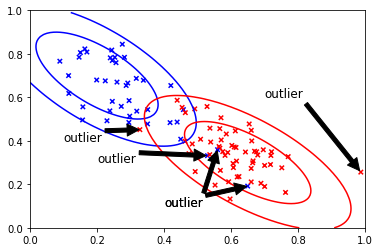

In [4]:
# Q1, Reading in the labels and the points
labelsnpy = np.load("/home/david/Desktop/School/Stats701/Homework6/hw6_files/labels.npy")
pointsdlm = np.loadtxt("/home/david/Desktop/School/Stats701/Homework6/hw6_files/points.dlm")

# Q2, Q3
# Plotting the points from points.dlm, and coloring based on the label from labels.npy
x, y = pointsdlm.T
color= ['red' if l == 1. else 'blue' for l in labelsnpy]
plt.scatter(x,y, c = color, marker = "x", s = 20) # Adjusting marker and size for viewability

# Group 0 Ellipses (in blue)
mu0 = np.array([0.2, 0.7]) # Given mean array
cov0 = np.array([[0.015,-0.011],[-0.011,0.018]]) # Given Covariance matrix
mvn0 = scipy.stats.multivariate_normal(mu0, cov0) 

# Establishes contours for plotting
x, y = np.mgrid[0:1:.01, 0:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

# Blue contour lines, approximate level parameters are found by observing the relationship with 
# the chi-squared dist. , found in the homework specs
plt.contour(x, y, mvn0.pdf(pos), levels = [0.7, 4.3], colors = "blue") 

# Group 1 Ellipses (in red)
mu1 = np.array([0.65, 0.3]) # Given mean array
cov1 = np.array([[0.016,-0.011],[-0.011,0.016]]) # Given Covariance matrix
mvn1 = scipy.stats.multivariate_normal(mu1, cov1)

# Establishes contours for plotting
x, y = np.mgrid[0:1:.01, 0:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

# Red contour lines, approximate level parameters are found by observing the relationship with 
# the chi-squared dist. , found in the homework specs
plt.contour(x, y, mvn1.pdf(pos), levels = [0.7, 4.5], colors = "red")

# Q4
# Pointing out the outliers
plt.annotate('outlier', xy = (0.98788763, 0.25612301), xytext = (0.7, 0.6), 
             fontsize = 12, arrowprops = dict(facecolor = 'black', shrink = 0.02))
plt.annotate('outlier', xy = (0.32796263, 0.45138817), xytext = (0.1, 0.4), 
             fontsize = 12, arrowprops = dict(facecolor = 'black', shrink = 0.02))
plt.annotate('outlier', xy = (0.64990065, 0.19183258), xytext = (0.4, 0.1), 
             fontsize = 12, arrowprops = dict(facecolor = 'black', shrink = 0.02))
plt.annotate('outlier', xy = (0.56000414, 0.3592668), xytext = (0.4, 0.1), 
             fontsize = 12, arrowprops = dict(facecolor = 'black', shrink = 0.02))
plt.annotate('outlier', xy = (0.52992117, 0.33167716), xytext = (0.2, 0.3), 
             fontsize = 12, arrowprops = dict(facecolor = 'black', shrink = 0.02))

# Setting the bounds for the graph
plt.xlim(0, 1)
plt.ylim(0, 1)
_ = plt.show()

Q4: Is data "normal"? Also, pointing out the outlier in the previous graph.

After overlaying the contours of multivariate normals on the data, they do seem to enclose each data group reasonably approximately well. From a high-level quick view, it would not seem to be unreasonable to believe that the data appear normally distributed and outliers seems to be kept to a reasonable minimum. Outliers are pointed above in the graph itself

Part 3: Conway's Game of Life  
(Spent about 3 hours)

Q1: is_valid_board function

In [5]:
def is_valid_board(numpy):
    if (type(numpy) is np.ndarray):
        switch = False
        if np.count_nonzero((numpy!=0.0) & (numpy!=1.0))==0: # If all values in the possible array are 0 or 1
            switch = True
        if (type(numpy) is np.ndarray) and (switch == True): # Checking the Type of input as well
            return True
        else:
            return False
    else:
        raise TypeError("The input needs to be of numpy array type!")
# Testing
array1 = np.array([[0.0, 1.0], [1.0, 1.0]])
array2 = np.array([[1.0, 1.1], [1.2, 1.3]])
array3 = "string"

print(is_valid_board(array1)) # Should be True
print(is_valid_board(array2)) # Should be False
#print(is_valid_board(array3)) # will be an error

True
False


Q2: gol_step function

In [6]:
def countlive(numpy, a, b): # A helper function that determines how many live neighbors adjacent to a point, (a,b) is coordinates
    counter = 0 # Keeps track of how many live neighbors are adjacent
    wrapped = np.pad(numpy, 1, mode='wrap') # A wrapped version of the numpy input array
    x = a + 1 # new x coordinate, mapped from numpy array into wrapped array
    y = b + 1 # new y coordinate, mapped from numpy array into wrapped array
    # New coordinate in the wrapped form of matrix is (x,y)
    
    # Check top-left neighbor
    topleft = wrapped[x-1, y-1]
    if (topleft == 1.0):
        counter = counter + 1
        
    # Check top neighbor 
    top = wrapped[x-1, y]
    if (top == 1.0):
        counter = counter + 1
        
    # Check top-right neighbor
    topright = wrapped[x-1, y+1]
    if (topright == 1.0):
        counter = counter + 1
        
    # Check left neighbor
    left = wrapped[x, y-1]
    if (left == 1.0):
        counter = counter + 1
        
    # Check right neighbor
    right = wrapped[x, y+1]
    if (right == 1.0):
        counter = counter + 1
        
    # Check bottom-left neighbor
    bottomleft = wrapped[x+1, y-1]
    if (bottomleft == 1.0):
        counter = counter + 1
        
    # Check bottom neighbor
    bottom = wrapped[x+1, y]
    if (bottom == 1.0):
        counter = counter + 1
        
    # Check bottom-right neighbor
    bottomright = wrapped[x+1, y+1]
    if (bottomright == 1.0):
        counter = counter + 1
        
    return counter

def gol_step(numpy):
    if (type(numpy) is np.ndarray): # Check input is a numpy array at all
        if is_valid_board(numpy): # Check that the numpy array is a valid game board
            newboard = np.full_like(numpy, 0.0) # Creates another board with same dimensions as input array, filled with 0
            for x in range(numpy.shape[0]):
                for y in range(numpy.shape[1]):
                    if (numpy[x,y] == 0.0): # If the cell is a dead cell...
                        if (countlive(numpy,x,y) == 3): # If 3 live neighbors..cell is alive
                            newboard[x,y] = 1.0
                        else: # Else stays dead
                            newboard[x,y] = 0.0
                    elif (numpy[x,y] == 1.0): # If the cell is a live cell...
                        if (countlive(numpy, x, y) < 2): # If less than 2 live neighbors, cell is dead
                            newboard[x,y] = 0.0
                        elif (countlive(numpy, x, y) > 3): # If more than 3 live neighbors, cell is dead
                            newboard[x,y] = 0.0
                        else: # Else stays alive
                            newboard[x,y] = 1.0
                    else:
                        raise ValueError("A value was not 1.0 or 0.0!")
            return newboard
        else:
            raise TypeError("The input was a numpy array, but needs to be a valid Game of Life board! Check the Specs..")
    else:
        raise TypeError("The input was not of numpy array type")
# Testing
testboard = np.array([[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 1.0, 1.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0]])
print(testboard) # A testboard, matching in the specs
step1 = gol_step(testboard)
print(step1) # Step 1 execution
expectedstep1 = np.array([[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 1.0, 0.0], [0.0, 0.0, 1.0, 1.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0]])
print(expectedstep1) # The expected board after step 1 execution
print(np.array_equal(step1, expectedstep1)) # Checks if Step 1 execution was correct, should return True


[[0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0.]]
True


Q3: draw_gol_board

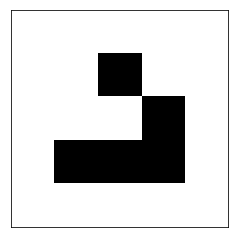

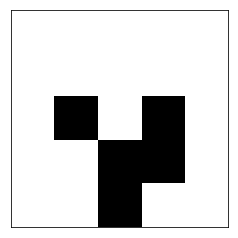

In [7]:
def draw_gol_board(numpy):
    if(type(numpy) is np.ndarray):
        # Some colormap settings
        colormap = plt.get_cmap('binary')
        colormap.set_bad(color='black')
        
        # We can set the default color to be white, but color black for cells that are alive
        # Alive cells are pointed out by the mask function in numpy
        masked_bad = np.ma.masked_where(numpy == 1, numpy)
        plt.imshow(masked_bad, cmap=colormap)
        plt.tick_params(which='both', bottom=False, left=False, top = False, right = False,
            labelbottom=False, labelleft=False, labeltop = False, labelright = False)
        plt.show()
    else:
        raise TypeError("The Input needs to be a numpy array type!")
        
# Testing
draw_gol_board(testboard)
draw_gol_board(expectedstep1)

Q4: 100 x 100 numpy board

[[0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0.]]
(100, 100)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


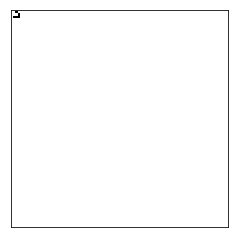

In [8]:
bigboard = np.zeros((100, 100)) # An empty 100x100 numpy array
# Below are the top-left coordinates where I'll insert "testboard", which is the pattern from the specs
insertxcoord = 0
insertycoord = 0
bigboard[insertxcoord:insertxcoord+testboard.shape[0], insertycoord:insertycoord+testboard.shape[1]] = testboard
print(bigboard[0:5, 0:5]) # Can check that top left of 100 x 100 was successfully patterned correctly
print(np.shape(bigboard)) # Can check that its a 100 x 100 numpy array
print(bigboard)
draw_gol_board(bigboard)

Q5: 5 subplots

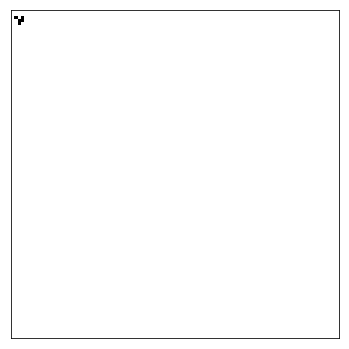

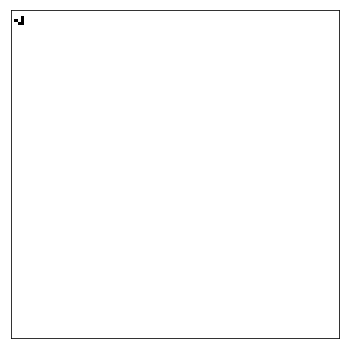

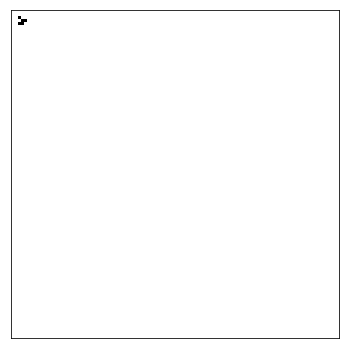

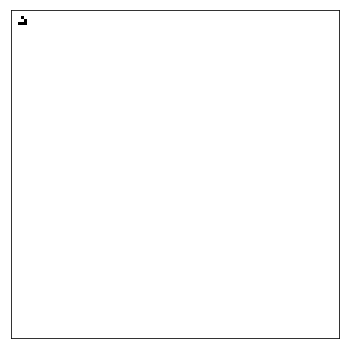

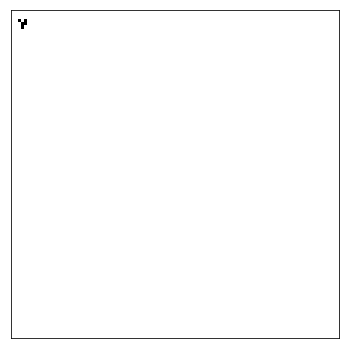

In [9]:
stepboard = bigboard # Initialize bigboard as the starting board
for subplt in range(511,516):
    plt.figure(figsize=(35,35))
    plt.subplot(subplt)
    newboard = gol_step(stepboard) # Do an iteration / step
    draw_gol_board(newboard) # Draw it
    stepboard = newboard
plt.show()